In [29]:
# https://medium.com/@pablosjv/importing-local-python-modules-into-jupyter-notebooks-87336b2d7746
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('./')) # or the path to your source code
sys.path.insert(0, module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Defining the Main Class

### Using deepso around the rosenbrock function

In [30]:
# extending the Indiviudal class to make space for the function
from individual_class import IndividualPSO

class RosenbrockPSO(IndividualPSO):
  def _fitness_function(self,X,a=1,b=100):
    x,y = X
    return pow((a - x),2) + b * pow((y - x**2),2)

def ff(X,a=1,b=100):
  x,y = X
  return (a - x)**2 + b*(y - x**2)**2

# extending the Indiviudal class to make space for the function
from individual_class import IndividualDEEPSO

class Rosenbrock(IndividualDEEPSO):
  def _fitness_function(self,X,a=1,b=100):
    x,y = X
    return pow((a - x),2) + b * pow((y - x**2),2)

def ff(X,a=1,b=100):
  x,y = X
  return (a - x)**2 + b*(y - x**2)**2

In [31]:
final_fitness_table = {}
final_fitness_table["mini"] = {}
final_fitness_table["mean"] = {}

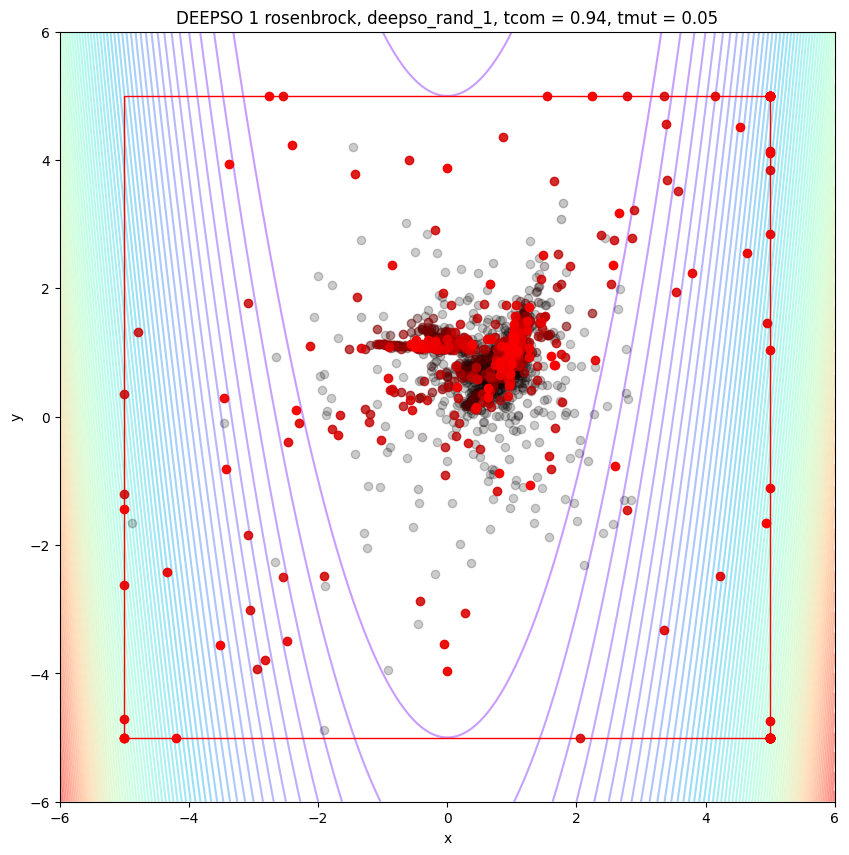

[array([1., 1.]), 0.0]


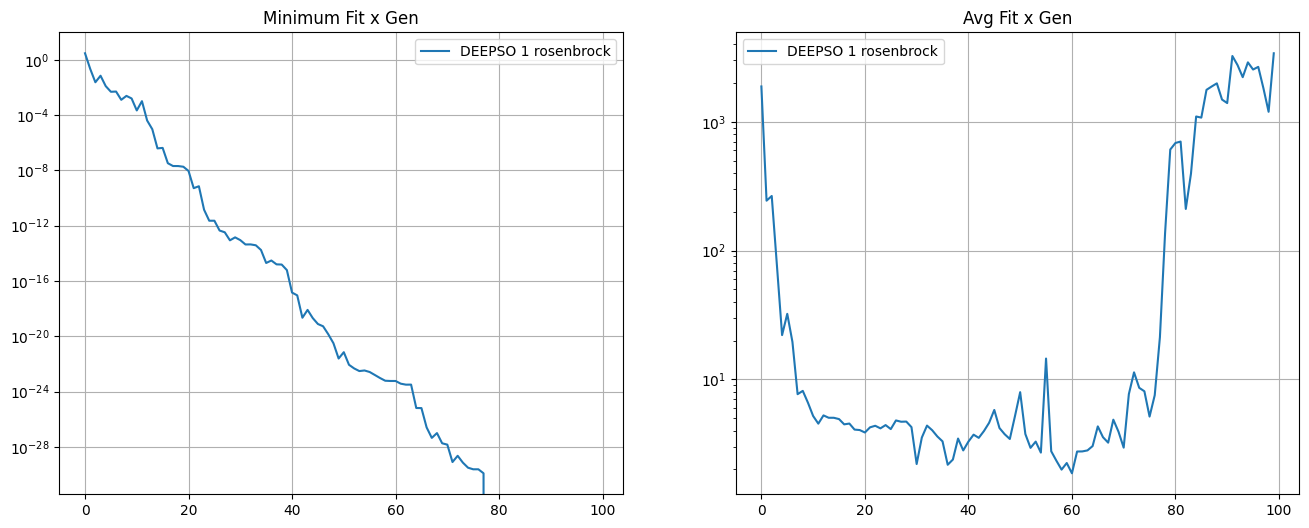

In [32]:
from graphical_visualization import get_last_best_ind
from graphical_visualization import store_average_fitness
from graphical_visualization import contour_over_population
from graphical_visualization import plot_fitness_over_generation

from algorithm_loop import deepso
from algorithm_loop import initial_uniform_pop
from algorithm_loop import initial_random_pop

tmut_variable = 0.05
tcom_variable = 0.94
experiment_name="deepso_rand_1"
title="DEEPSO 1 rosenbrock"

# initial and final pop stuff
population_size = 100
bound = [-5,5]
num_tests = 1 # number of tests to make
max_it = 100

final_fitness_table["mini"][title] = []
final_fitness_table["mean"][title] = []

lazy_title = [title,experiment_name,"tcom = "+str(tcom_variable),"tmut = "+str(tmut_variable)]
for _ in range(0,num_tests):
  coordinates = initial_random_pop(population_size,bound,dimensions=2)
  generation_data = deepso(experiment_name,
                                Rosenbrock,
                                coordinates,
                                max_it=max_it,
                                tcom=tcom_variable,
                                tmut=tmut_variable)
  store_average_fitness(generation_data,final_fitness_table,title,num_tests)

contour_over_population(generation_data,', '.join(lazy_title),ff,bound)
min(generation_data[max_it-1],key=lambda x: x.getFitness()).print()
plot_fitness_over_generation(final_fitness_table)

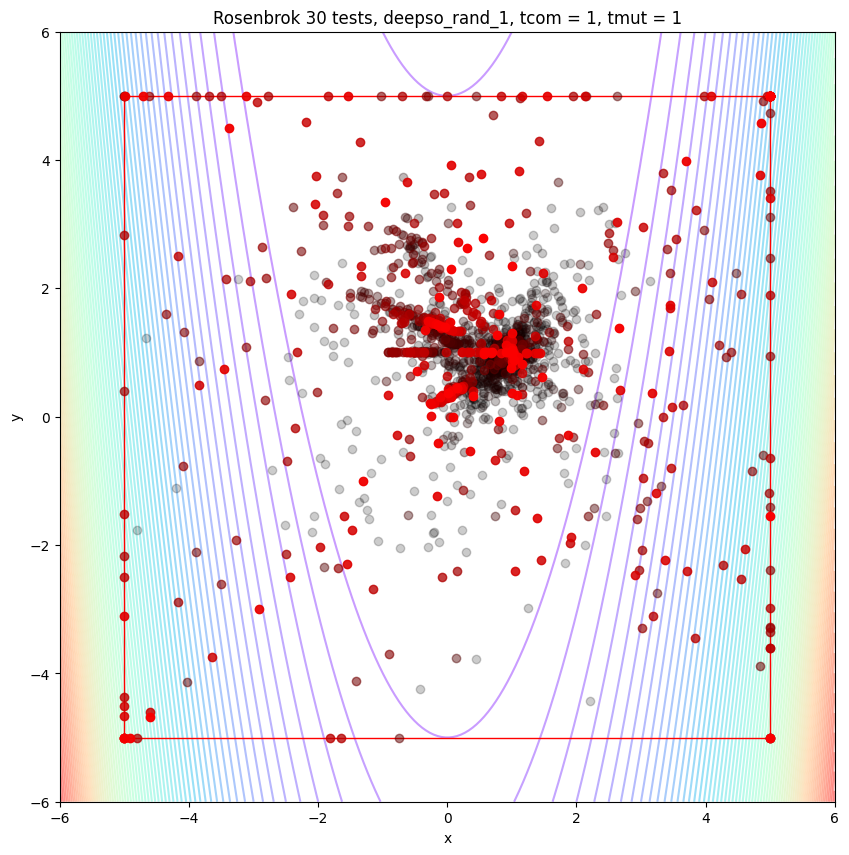

[array([1., 1.]), 0.0]


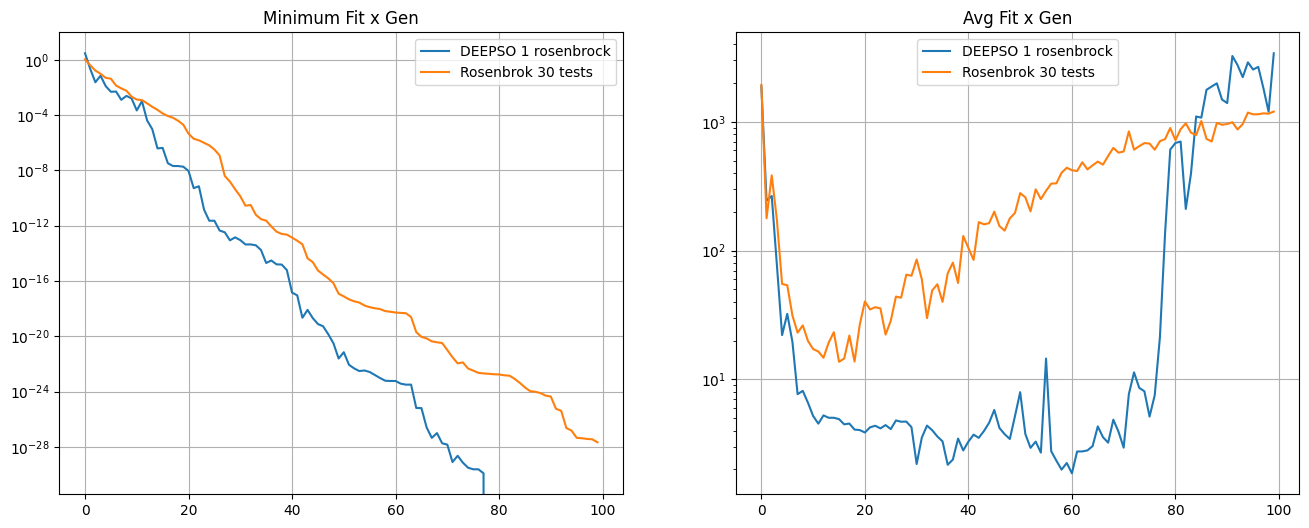

In [33]:
from graphical_visualization import get_last_best_ind
from graphical_visualization import store_average_fitness
from graphical_visualization import contour_over_population
from graphical_visualization import plot_fitness_over_generation

from algorithm_loop import deepso
from algorithm_loop import initial_uniform_pop
from algorithm_loop import initial_random_pop

tmut_variable = 1
tcom_variable = 1
experiment_name="deepso_rand_1"
title="Rosenbrok 30 tests"

# initial and final pop stuff
population_size = 100
bound = [-5,5]
num_tests = 30 # number of tests to make
max_it = 100

final_fitness_table["mini"][title] = []
final_fitness_table["mean"][title] = []

lazy_title = [title,experiment_name,"tcom = "+str(tcom_variable),"tmut = "+str(tmut_variable)]
for _ in range(0,num_tests):
  coordinates = initial_random_pop(population_size,bound,dimensions=2)
  generation_data = deepso(experiment_name,
                                Rosenbrock,
                                coordinates,
                                max_it=max_it,
                                tcom=0.94,
                                tmut=0.05)
  store_average_fitness(generation_data,final_fitness_table,title,num_tests)

contour_over_population(generation_data,', '.join(lazy_title),ff,bound)
min(generation_data[max_it-1],key=lambda x: x.getFitness()).print()
plot_fitness_over_generation(final_fitness_table)

# Using pure deepso around Himmemblau

In [38]:
final_fitness_table = {}
final_fitness_table["mini"] = {}
final_fitness_table["mean"] = {}

In [39]:
# extending the Indiviudal class to make space for the function
from individual_class import IndividualDEEPSO

class Himmelblau(IndividualDEEPSO):
  def _fitness_function(self,X):
    x,y = X
    return pow((x*x + y - 11),2) + pow((x + y*y - 7),2)

def ff(X,a=1,b=100):
  x,y = X
  return (x*x + y - 11)**2 + (x + y*y - 7)**2

[array([3., 2.]), 0.0]


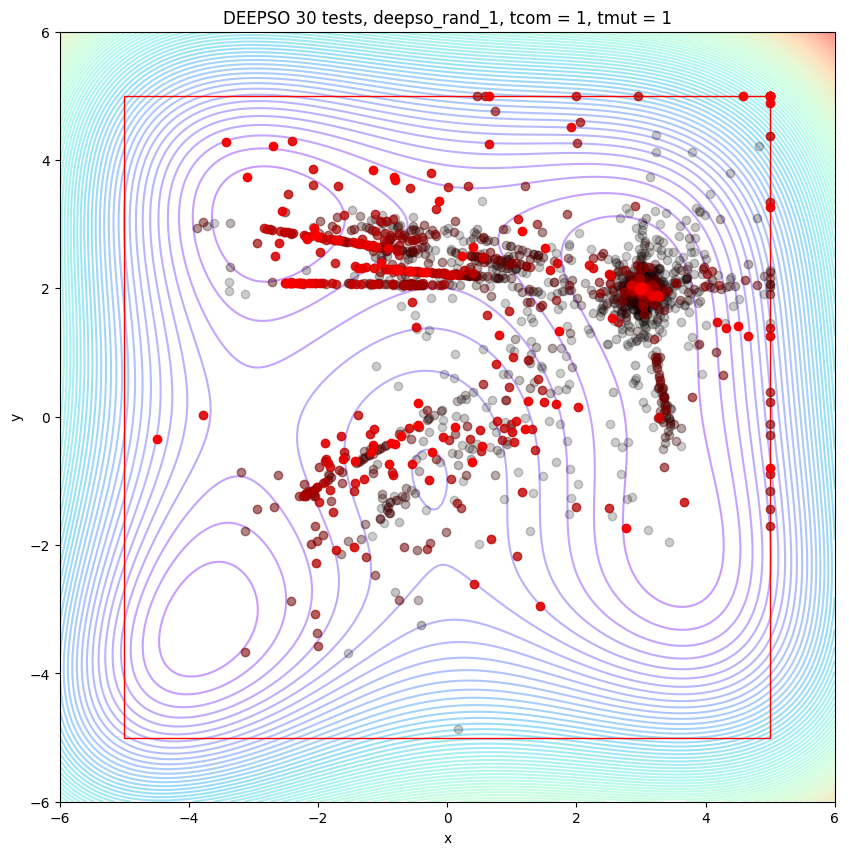

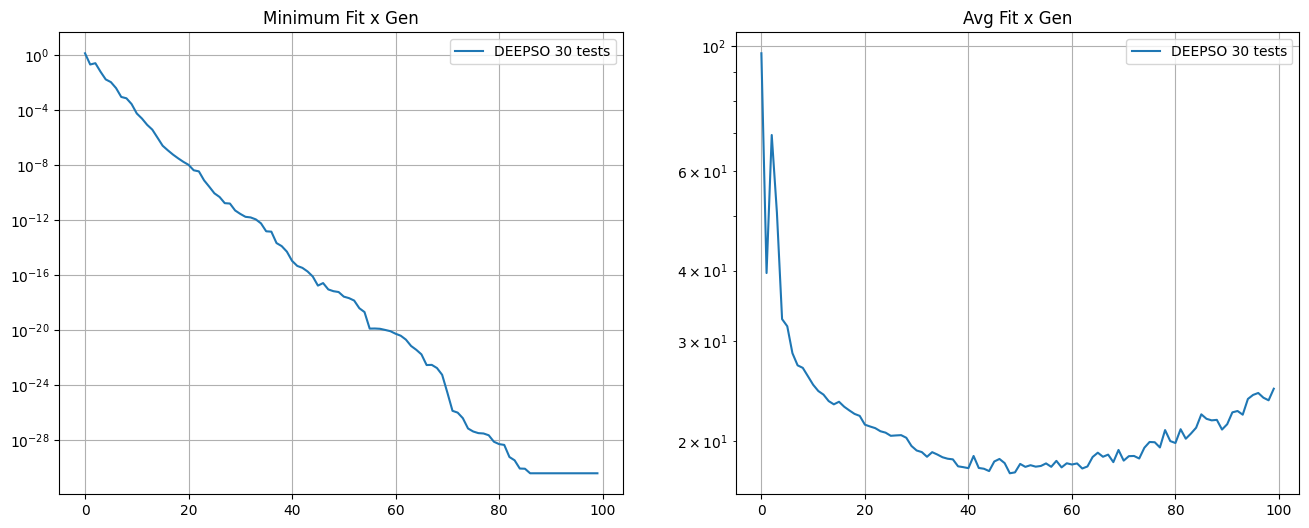

In [40]:
from graphical_visualization import get_last_best_ind
from graphical_visualization import store_average_fitness
from graphical_visualization import contour_over_population
from graphical_visualization import plot_fitness_over_generation

from algorithm_loop import deepso
from algorithm_loop import initial_uniform_pop
from algorithm_loop import initial_random_pop

tmut_variable = 1
tcom_variable = 1
experiment_name="deepso_rand_1"
title="DEEPSO 30 tests"

# initial and final pop stuff
population_size = 100
bound = [-5,5]
num_tests = 30 # number of tests to make
max_it = 100

final_fitness_table["mini"][title] = []
final_fitness_table["mean"][title] = []

lazy_title = [title,experiment_name,"tcom = "+str(tcom_variable),"tmut = "+str(tmut_variable)]
for _ in range(0,num_tests):
  coordinates = initial_random_pop(population_size,bound,dimensions=2)
  generation_data = deepso(experiment_name,
                                Himmelblau,
                                coordinates,
                                max_it=max_it,
                                tcom=0.94,
                                tmut=0.05)
  store_average_fitness(generation_data,final_fitness_table,title,num_tests)
    
min(generation_data[max_it-1],key=lambda x: x.getFitness()).print()
contour_over_population(generation_data,', '.join(lazy_title),ff,bound)
plot_fitness_over_generation(final_fitness_table)

# Hill Climbing + deepso

#### First try with hill climbing bound = 0.001

Difference = -0.0041008321964274355
Difference = -3.0052402328658273e-05
Difference = -7.470050327554705e-05
Difference = -2.150207644356764e-05
Difference = -6.11616525925021e-05
Difference = -9.660874900126855e-05
Difference = -2.3714993648481343e-05
Difference = -3.919438524269922e-05
Difference = -2.4610303040036634e-05
Difference = -0.00010779575093087643
Difference = -3.24916997768323e-05
Difference = -0.00027418701785546
Difference = -0.00020019046868241828
Difference = -5.658624409698764e-05
Difference = -5.770747386709265e-07
Difference = -0.0005152053208879051
Difference = -8.676869064509055e-05
Difference = -0.001965665135773268
Difference = -7.436735596361071e-05
Difference = -0.0006800223724813646
Difference = -5.8020077364006535e-05
Difference = -0.00033085026964454025
Difference = -0.001053318493438687
Difference = -0.00014353124557757238
Difference = -0.00014998512831167237
Difference = -9.93376795918593e-05
Difference = -5.9330815056316374e-05
Difference = -0.000232132

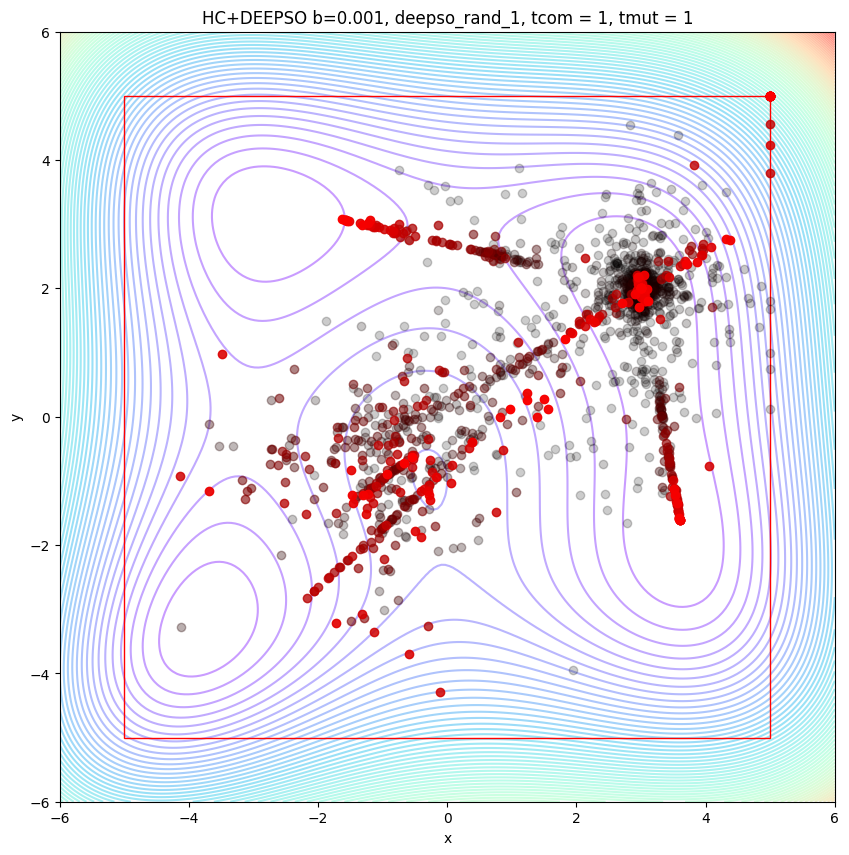

[array([3., 2.]), 0.0]


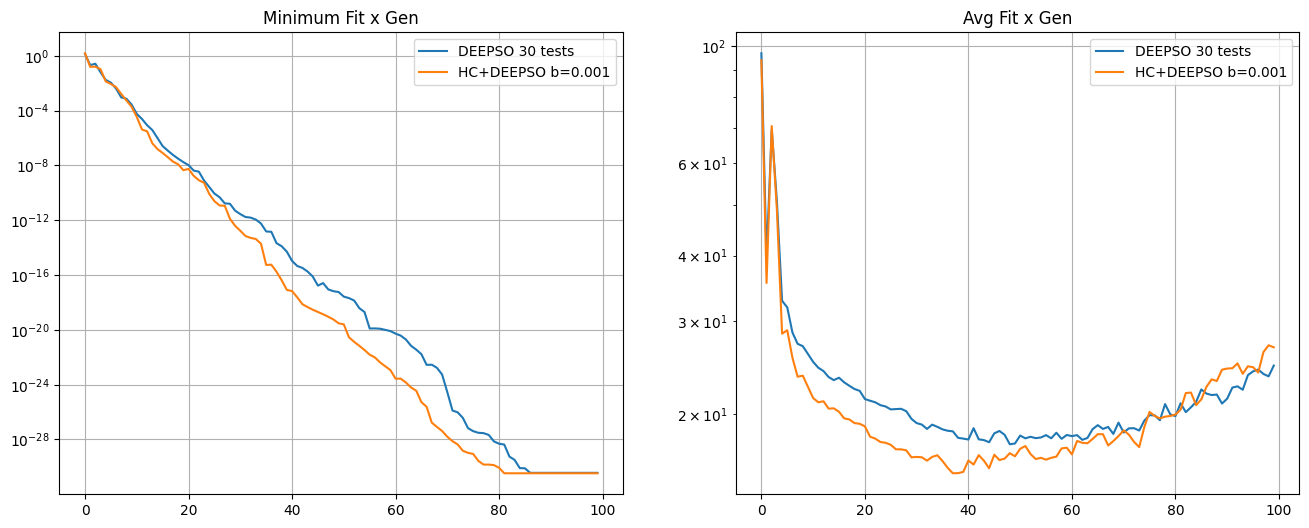

In [41]:
from graphical_visualization import get_last_best_ind
from graphical_visualization import store_average_fitness
from graphical_visualization import contour_over_population
from graphical_visualization import plot_fitness_over_generation

from algorithm_loop import deepso
from algorithm_loop import initial_uniform_pop
from algorithm_loop import initial_random_pop
from algorithm_loop import deepso_hill_climbing

experiment_name="deepso_rand_1"
title="HC+DEEPSO b=0.001"

# initial and final pop stuff
population_size = 100
bound = [-5,5]
num_tests = 30 # number of tests to make

final_fitness_table["mini"][title] = []
final_fitness_table["mean"][title] = []

lazy_title = [title,experiment_name,"tcom = "+str(tcom_variable),"tmut = "+str(tmut_variable)]
for _ in range(0,num_tests):
  coordinates = initial_random_pop(population_size,bound,dimensions=2)
  generation_data = deepso_hill_climbing(experiment_name,
                                Himmelblau,
                                coordinates,
                                max_it=100,
                                tcom=0.94,
                                tmut=0.05,
                                hc_bound=[-0.001,0.001],
                                hc_max_it=10,
                                hc_stops=[10])
  store_average_fitness(generation_data,final_fitness_table,title,num_tests)
contour_over_population(generation_data,', '.join(lazy_title),ff,bound)
min(generation_data[max_it-1],key=lambda x: x.getFitness()).print()
plot_fitness_over_generation(final_fitness_table)

Difference = -0.00037601539307758437
Difference = -0.00040966530925175124
Difference = 0.0
Difference = -0.00010699751129658728
Difference = -1.8926096771838794e-05
Difference = -0.00024937527697979113
Difference = -0.00027306337776175817
Difference = -5.3830990544581456e-05
Difference = -7.044335149179498e-05
Difference = -0.0005153901396191834
Difference = -5.606585542253206e-05
Difference = -0.0002772191404069191
Difference = -0.00014834486309247595
Difference = -0.0003564502888583411
Difference = -0.00018531505457976293
Difference = -2.6880859227977413e-05
Difference = -6.0689440913780477e-05
Difference = -0.0001463226598482824
Difference = -0.00043789679762212835
Difference = -4.096045545632812e-05
Difference = -0.00010157322071382189
Difference = -0.0005702030084573916
Difference = -0.000259098786589509
Difference = -3.8245889602679896e-05
Difference = 0.0
Difference = -0.0004169768647141336
Difference = -0.00028239390429277925
Difference = -0.0001110754534253668
Difference = -0.

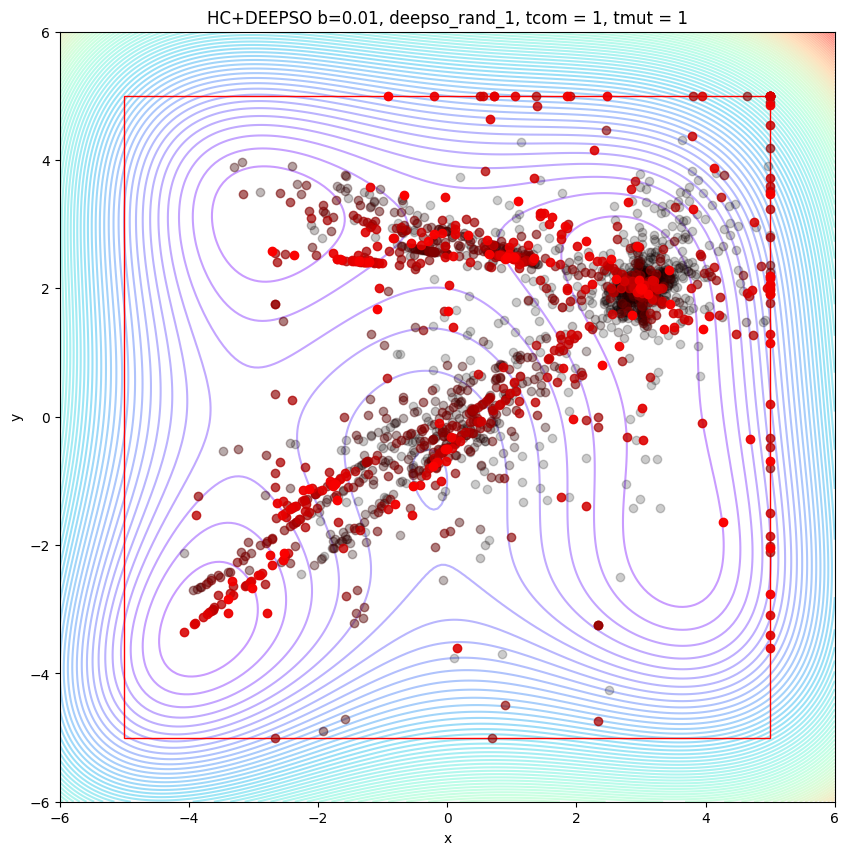

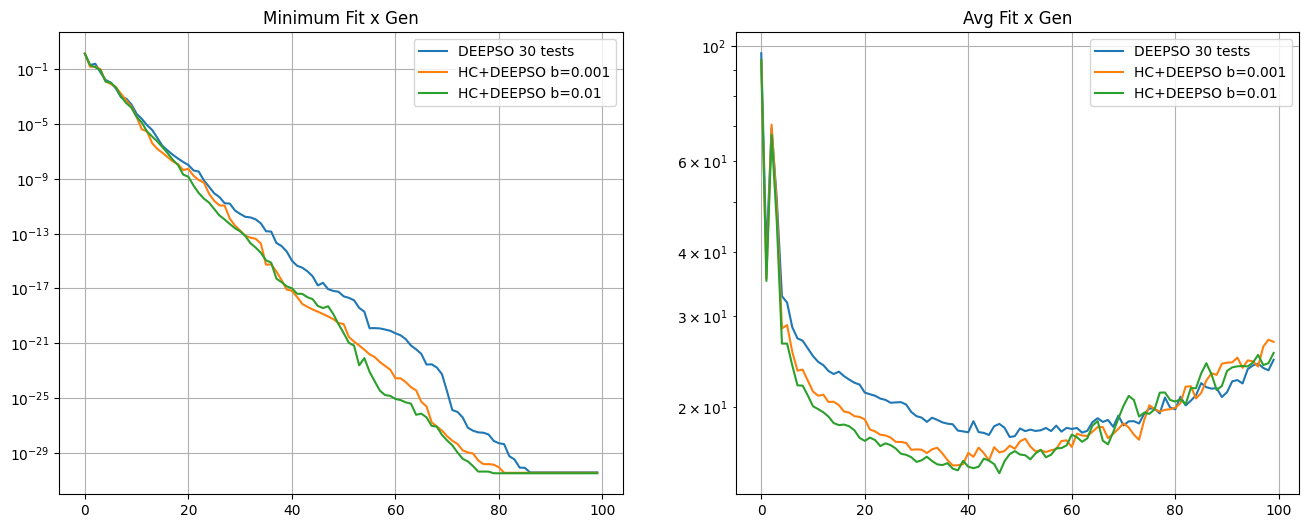

In [42]:
experiment_name="deepso_rand_1"
title="HC+DEEPSO b=0.01"

# initial and final pop stuff
population_size = 100
bound = [-5,5]
num_tests = 30 # number of tests to make

final_fitness_table["mini"][title] = []
final_fitness_table["mean"][title] = []

lazy_title = [title,experiment_name,"tcom = "+str(tcom_variable),"tmut = "+str(tmut_variable)]
for _ in range(0,num_tests):
  coordinates = initial_random_pop(population_size,bound,dimensions=2)
  generation_data = deepso_hill_climbing(experiment_name,
                                Himmelblau,
                                coordinates,
                                max_it=100,
                                tcom=0.94,
                                tmut=0.05,
                                hc_bound=[-0.01,0.01],
                                hc_max_it=10,
                                hc_stops=[10])
  store_average_fitness(generation_data,final_fitness_table,title,num_tests)
  #min(generation_data[max_it-1],key=lambda x: x.getFitness()).print()

contour_over_population(generation_data,', '.join(lazy_title),ff,bound)

plot_fitness_over_generation(final_fitness_table)

Difference = -4.129133111732935e-05
Difference = -0.0007916339796824813
Difference = -0.00039496267775634096
Difference = -1.5489498639639745e-05
Difference = -7.911618399137463e-05
Difference = -0.0007504775491150276
Difference = -0.003167147779759377
Difference = -0.00018589092903985657
Difference = -0.0030441262624272417
Difference = -1.3805723837198095e-05
Difference = -0.00016951219774864818
Difference = -0.00014974116230336972
Difference = -0.00017352683782140965
Difference = -1.3844441890160424e-05
Difference = -0.00018147781187356811
Difference = -0.0005418552517711258
Difference = -1.9349789826598656e-05
Difference = -0.00021551930479638893
Difference = -0.0001581893625414491
Difference = -0.00017718982073490158
Difference = -2.9167098459058666e-05
Difference = -4.004265875528276e-05
Difference = -0.00016648768371649506
Difference = -4.794534157625874e-05
Difference = -0.00010350382249920015
Difference = -5.736251656906643e-05
Difference = -0.0002747390414190722
Difference = -

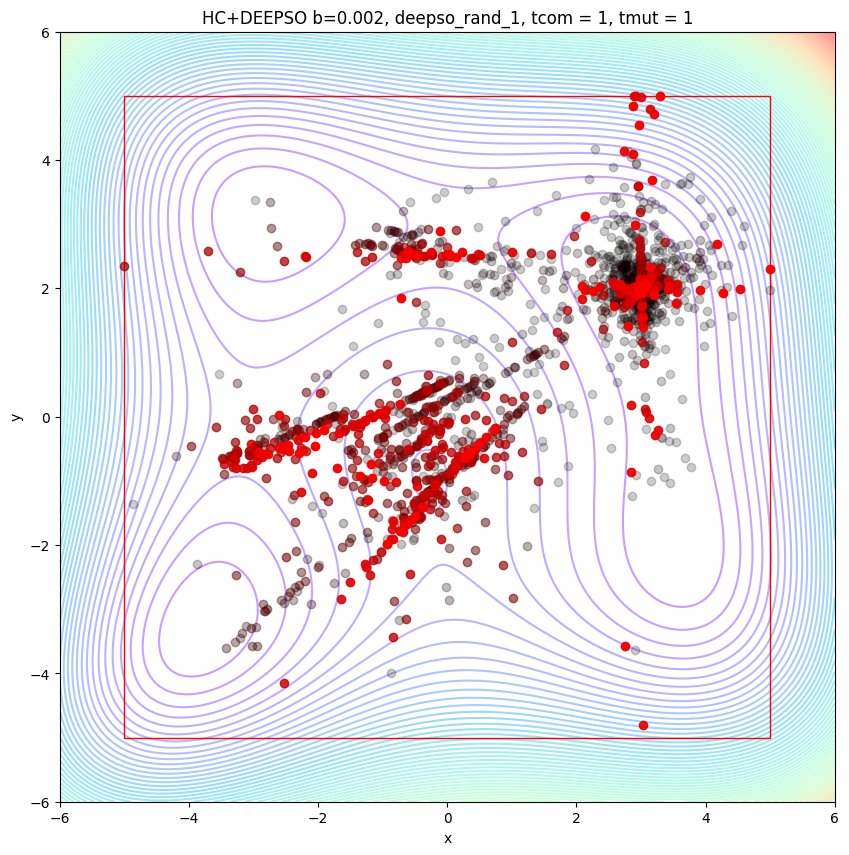

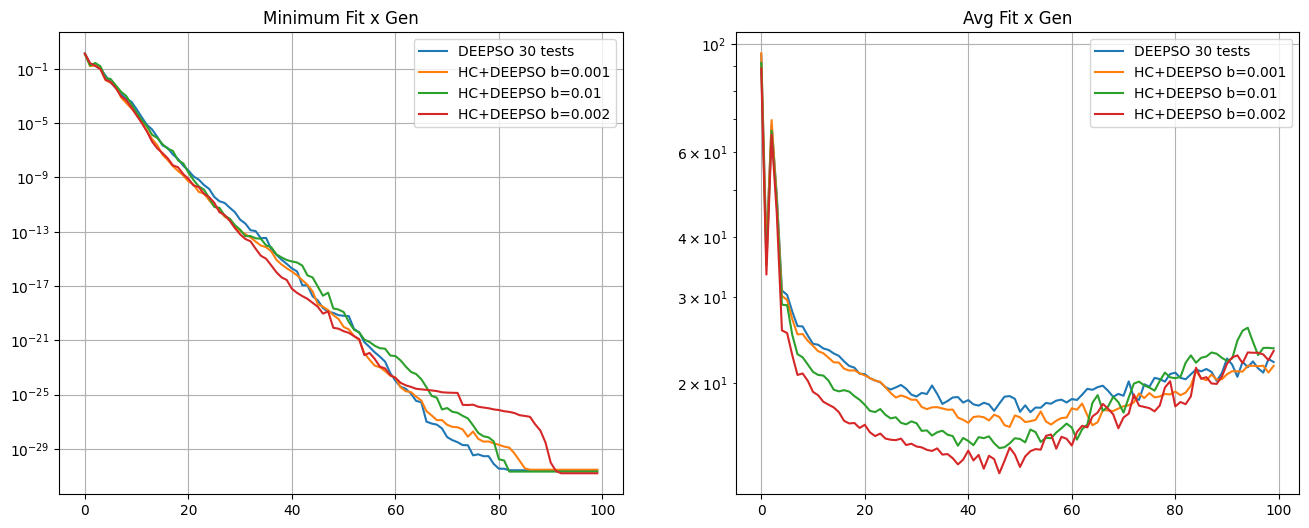

In [23]:
experiment_name="deepso_rand_1"
title="HC+DEEPSO b=0.002"

# initial and final pop stuff
population_size = 100
bound = [-5,5]
num_tests = 30 # number of tests to make

final_fitness_table["mini"][title] = []
final_fitness_table["mean"][title] = []

lazy_title = [title,experiment_name,"tcom = "+str(tcom_variable),"tmut = "+str(tmut_variable)]
for _ in range(0,num_tests):
  coordinates = initial_random_pop(population_size,bound,dimensions=2)
  generation_data = deepso_hill_climbing(experiment_name,
                                Himmelblau,
                                coordinates,
                                max_it=100,
                                tcom=0.94,
                                tmut=0.05,
                                hc_bound=[-0.002,0.002],
                                hc_max_it=10,
                                hc_stops=[10])
  store_average_fitness(generation_data,final_fitness_table,title,num_tests)
  #min(generation_data[max_it-1],key=lambda x: x.getFitness()).print()

contour_over_population(generation_data,', '.join(lazy_title),ff,bound)

plot_fitness_over_generation(final_fitness_table)